In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append('../..')

# Creature

In [2]:
from lamarck import Creature

In [3]:
genome = {
    'x': 10,
    'y': 'A',
    'z': (1, 2, 3)
}

In [4]:
creature = Creature(genome)

In [5]:
creature.id

-5560638821729912812

# Genome Creator

In [6]:
from lamarck.assistant import GenomeCreator

In [7]:
genome_creator = GenomeCreator()

In [8]:
genome_creator.add_gene_specs.numeric(name='x',
                                      min=0,
                                      max=10,
                                      progression='linear',
                                      domain='int')

genome_creator.add_gene_specs.categorical(name='y', domain=['A', 'B', 'C', 'D', 'E'])

genome_creator.add_gene_specs.vectorial(name='z', length=4, replace=False, domain=['i', 'j', 'k', 'l', 'm'])

In [9]:
genome_blueprint = genome_creator.get_genome_blueprint()

In [10]:
genome_blueprint

{'x': {'type': 'numeric',
  'domain': 'int',
  'ranges': {'min': 0, 'max': 10, 'progression': 'linear'}},
 'y': {'type': 'categorical', 'domain': ['A', 'B', 'C', 'D', 'E']},
 'z': {'type': 'vectorial',
  'domain': ['i', 'j', 'k', 'l', 'm'],
  'ranges': {'length': 4, 'replace': False}}}

# Population Creator

In [11]:
from lamarck.assistant import PopulationCreator

In [12]:
pop_creator = PopulationCreator(genome_blueprint)

In [13]:
popdet = pop_creator.create.det(8)
popdet

Population with 320 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [14]:
popdet.datasets.input.head()

,x,y,z
id,,,
-1200538809516907093,0,A,"(i, j, k, l)"
-6404807193527412409,0,A,"(i, l, k, m)"
-4749884983532919515,0,A,"(j, k, i, l)"
-8999850930677188027,0,A,"(j, m, k, l)"
3869098367480049733,0,A,"(k, l, i, j)"


In [15]:
poprand = pop_creator.create.rand(500)
poprand

Population with 484 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [16]:
poprand.datasets.input.head()

,x,y,z
id,,,
979920352793587711,8,C,"(j, k, m, i)"
8544407556410542478,3,B,"(i, l, k, j)"
-6318525774530930304,8,E,"(m, i, k, l)"
4832573033087972263,3,C,"(i, k, l, m)"
5080882965451755200,5,D,"(m, j, k, l)"


In [17]:
pop = popdet + poprand
pop

Population with 789 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [18]:
pop.datasets.input.head()

,x,y,z
id,,,
-1200538809516907093,0,A,"(i, j, k, l)"
-6404807193527412409,0,A,"(i, l, k, m)"
-4749884983532919515,0,A,"(j, k, i, l)"
-8999850930677188027,0,A,"(j, m, k, l)"
3869098367480049733,0,A,"(k, l, i, j)"


In [19]:
pop.define()

# Environment

In [20]:
from lamarck import Environment

In [21]:
import hashlib

def tuplehash(tuple_obj):
    encoded = ''.join(tuple_obj).encode()
    m = hashlib.md5()
    m.update(encoded)
    d = m.digest()
    return int.from_bytes(d, 'big')
    
    
def dummy_process(x, y, z):
    zval = (tuplehash(z) % 1000) / (x+1)**0.75
    yval = zval // ord(y) + tuplehash((y, y)) % 73
    return {
        'time': (x + 1) * abs(zval - yval) // 10,
        'profit': (abs(3*zval - 2*yval)**((int(x/10) + 1) % 9) // (tuplehash((y, y)) % 7 + 1)) % 10000 + (zval*yval) //10
    }

In [22]:
env = Environment()

In [23]:
env.config.set_process(dummy_process)

In [24]:
env.config

multi:   False
process:   <function dummy_process at 0x7f6cbc830790>

### Simulate Creature

In [25]:
cr = pop[0]

In [26]:
env.simulate(cr)

{'time': 95.0, 'profit': 2154.0}

### Simulate Population

In [27]:
simpop = pop.copy()

In [28]:
env.simulate(simpop)

In [29]:
simpop.datasets.output.head()

,x,y,z,time,profit
id,,,,,
-1200538809516907093,0,A,"(i, j, k, l)",95.0,2154.0
-6404807193527412409,0,A,"(i, l, k, m)",62.0,1105.0
-4749884983532919515,0,A,"(j, k, i, l)",56.0,930.0
-8999850930677188027,0,A,"(j, m, k, l)",27.0,338.0
3869098367480049733,0,A,"(k, l, i, j)",45.0,715.0


### Simulate Population - Multi Thread

In [30]:
env.config.set_multi(True)

In [31]:
env.simulate(simpop)

In [32]:
simpop.datasets.output.head()

,x,y,z,time,profit
id,,,,,
-1200538809516907093,0,A,"(i, j, k, l)",95.0,2154.0
-6404807193527412409,0,A,"(i, l, k, m)",62.0,1105.0
-4749884983532919515,0,A,"(j, k, i, l)",56.0,930.0
-8999850930677188027,0,A,"(j, m, k, l)",27.0,338.0
3869098367480049733,0,A,"(k, l, i, j)",45.0,715.0


# Fitness

### 1. Single Objective

In [33]:
single_objective_pop = simpop.copy()
single_objective_pop.apply_fitness.single_objective(output='time', objective='min')

In [34]:
single_objective_pop.datasets.fitness.head()

,x,y,z,time,profit,criteria
id,,,,,,
4962223141712708727,5,E,"(i, l, k, j)",0.0,236.0,0.0
-8759710075881808183,3,A,"(m, l, i, j)",0.0,1.0,0.0
-4107943141842962231,0,D,"(m, l, i, j)",0.0,17.0,0.0
2524840627078154993,1,A,"(m, l, i, j)",0.0,3.0,0.0
-1558298724280610971,8,B,"(j, i, m, l)",0.0,74.0,0.0


### 2. Multi Objective - Ranked

In [35]:
ranked_objective_pop = simpop.copy()
ranked_objective_pop.apply_fitness.multi_objective.ranked(priorities=['time', 'profit'], objectives=['min', 'max'])

In [36]:
ranked_objective_pop.datasets.fitness.head()

,x,y,z,time,profit,criteria0,criteria1
id,,,,,,,
4962223141712708727,5,E,"(i, l, k, j)",0.0,236.0,0.0,236.0
1779658001658486100,0,B,"(l, k, m, j)",0.0,91.0,0.0,91.0
-1558298724280610971,8,B,"(j, i, m, l)",0.0,74.0,0.0,74.0
-5758732775881025772,5,D,"(j, i, l, k)",0.0,30.0,0.0,30.0
-4107943141842962231,0,D,"(m, l, i, j)",0.0,17.0,0.0,17.0


### 3. Multi Objective - Pareto

In [37]:
pareto_objective_pop = simpop.copy()
pareto_objective_pop.apply_fitness.multi_objective.pareto(outputs=['time', 'profit'], objectives=['min', 'max'])

In [38]:
pareto_objective_pop.datasets.fitness.head()

,x,y,z,time,profit,criteria0,criteria1,front,crowd
id,,,,,,,,,
1472106222770972322,10,E,"(i, l, k, m)",64.0,10444.0,-0.097089,6.819762,1,inf
-8759710075881808183,3,A,"(m, l, i, j)",0.0,1.0,-1.557939,-0.677316,1,inf
2524840627078154993,1,A,"(m, l, i, j)",0.0,3.0,-1.557939,-0.675880,1,inf
5712477236190665653,10,B,"(l, m, i, j)",13.0,3417.0,-1.261204,1.775046,1,4.899793
3012188921196542691,10,B,"(l, i, k, m)",22.0,7089.0,-1.055772,4.411192,1,4.269620


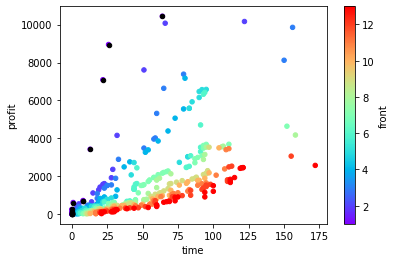

In [39]:
ax = pareto_objective_pop.plot.fronts('time', 'profit', 1)

# Selection

In [40]:
selected_pop = pareto_objective_pop.copy()
selected_pop.select()

In [41]:
selected_pop.datasets.fitness

,x,y,z,time,profit,criteria0,criteria1,front,crowd
id,,,,,,,,,
1472106222770972322,10,E,"(i, l, k, m)",64.0,10444.0,-0.097089,6.819762,1,inf
-8759710075881808183,3,A,"(m, l, i, j)",0.0,1.0,-1.557939,-0.677316,1,inf
2524840627078154993,1,A,"(m, l, i, j)",0.0,3.0,-1.557939,-0.675880,1,inf
5712477236190665653,10,B,"(l, m, i, j)",13.0,3417.0,-1.261204,1.775046,1,4.899793
3012188921196542691,10,B,"(l, i, k, m)",22.0,7089.0,-1.055772,4.411192,1,4.269620
...,...,...,...,...,...,...,...,...,...
-3809405382912197103,10,A,"(m, j, k, l)",172.0,2564.0,2.368095,1.162673,13,inf
-1090812876285543171,5,E,"(l, j, m, k)",21.0,61.0,-1.078598,-0.634242,13,inf
-4981153807645682329,8,A,"(l, k, j, i)",21.0,21.0,-1.078598,-0.662958,13,inf


# Repopulate

In [42]:
newpop = selected_pop.copy()
newpop

Population with 394 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [43]:
newpop.datasets.fitness

,x,y,z,time,profit,criteria0,criteria1,front,crowd
id,,,,,,,,,
1472106222770972322,10,E,"(i, l, k, m)",64.0,10444.0,-0.097089,6.819762,1,inf
-8759710075881808183,3,A,"(m, l, i, j)",0.0,1.0,-1.557939,-0.677316,1,inf
2524840627078154993,1,A,"(m, l, i, j)",0.0,3.0,-1.557939,-0.675880,1,inf
5712477236190665653,10,B,"(l, m, i, j)",13.0,3417.0,-1.261204,1.775046,1,4.899793
3012188921196542691,10,B,"(l, i, k, m)",22.0,7089.0,-1.055772,4.411192,1,4.269620
...,...,...,...,...,...,...,...,...,...
-3809405382912197103,10,A,"(m, j, k, l)",172.0,2564.0,2.368095,1.162673,13,inf
-1090812876285543171,5,E,"(l, j, m, k)",21.0,61.0,-1.078598,-0.634242,13,inf
-4981153807645682329,8,A,"(l, k, j, i)",21.0,21.0,-1.078598,-0.662958,13,inf


In [44]:
newpop.reproduce.tournament(n_children=len(newpop)/2)

In [45]:
newpop.reproduce.elitism()

In [46]:
newpop

Population with 678 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [47]:
env.simulate(newpop)

In [48]:
newpop.apply_fitness.multi_objective.pareto(outputs=['time', 'profit'], objectives=['min', 'max'])

In [49]:
newpop.datasets.fitness

,x,y,z,time,profit,criteria0,criteria1,front,crowd
id,,,,,,,,,
1472106222770972322,10,E,"(i, l, k, m)",64.0,10444.0,0.416245,4.635365,1,inf
-8759710075881808183,3,A,"(m, l, i, j)",0.0,1.0,-1.292524,-0.759168,1,inf
7371714090830683871,10,B,"(l, m, k, i)",0.0,429.0,-1.292524,-0.538076,1,inf
3012188921196542691,10,B,"(l, i, k, m)",22.0,7089.0,-0.705135,2.902275,1,3.205788
5712477236190665653,10,B,"(l, m, i, j)",13.0,3417.0,-0.945431,1.005433,1,2.789950
...,...,...,...,...,...,...,...,...,...
-7576880077780931238,5,D,"(k, j, m, i)",13.0,79.0,-0.945431,-0.718876,10,0.000517
7951810026436150447,1,C,"(l, m, i, j)",20.0,289.0,-0.758534,-0.610396,10,0.000517
-5856060138090699817,2,C,"(i, k, m, l)",29.0,271.0,-0.518238,-0.619694,10,0.000517


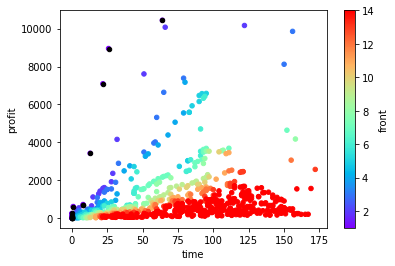

In [50]:
ax = pareto_objective_pop.plot.fronts('time', 'profit', 1, show_worst=True)

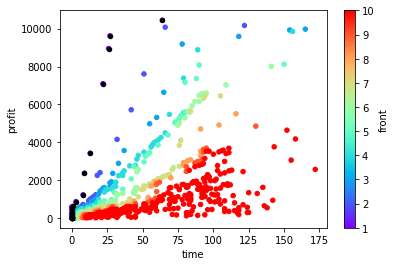

In [51]:
ax = newpop.plot.fronts('time', 'profit', 1, show_worst=True)